# 🛒 Instacart Customer Behavior Analysis

This notebook analyzes customer order data from Instacart to uncover shopping patterns, such as popular times to order, most reordered products, and more.

### 1.1 Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load datasets

In [60]:
orders = pd.read_csv("../data/instacart_orders.csv", delimiter=';')
products = pd.read_csv("../data/products.csv", delimiter=';')
order_products = pd.read_csv("../data/order_products.csv", delimiter=';')
aisles = pd.read_csv("../data/aisles.csv", delimiter=';')
departments = pd.read_csv("../data/departments.csv", delimiter=';')

### 1.3 Quick Overview

In [61]:
# Show the first rows of each dataframe
print("First rows of each dataset:")
print("orders:")
print(orders.head())
print("\nproducts:")
print(products.head())
print("\norder_products:")
print(order_products.head())
print("\naisles:")
print(aisles.head())
print("\ndepartments:")
print(departments.head())

# General info of each dataframe
print("\nGeneral info for each dataset:")
print("orders:")
print(orders.info())
print("\nproducts:")
print(products.info())
print("\norder_products:")
print(order_products.info(show_counts=True))  # show_counts=True for large datasets
print("\naisles:")
print(aisles.info())
print("\ndepartments:")
print(departments.info())

First rows of each dataset:
orders:
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

products:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...

### 1.4 Fix data types

In [62]:
# Convert relevant columns to int or float if needed (example for orders)
orders['order_id'] = orders['order_id'].astype(int)
orders['user_id'] = orders['user_id'].astype(int)
orders['order_number'] = orders['order_number'].astype(int)
orders['order_dow'] = orders['order_dow'].astype(int)
orders['order_hour_of_day'] = orders['order_hour_of_day'].astype(int)
# days_since_prior_order has NaNs, keep as float

### 1.5 Handle missing values

In [63]:
# For orders.days_since_prior_order, fill nulls with 0 (assuming first order)
orders['days_since_prior_order'].fillna(0, inplace=True)

# For order_products.add_to_cart_order, check how many nulls
print(f"Nulls in add_to_cart_order: {order_products['add_to_cart_order'].isnull().sum()}")

# If few nulls, you can fill with median or mode; else investigate further
order_products['add_to_cart_order'].fillna(order_products['add_to_cart_order'].median(), inplace=True)

Nulls in add_to_cart_order: 836


### 1.6 Detect and remove duplicates

In [64]:
# Check duplicates in each DataFrame
print(f"Orders duplicates: {orders.duplicated().sum()}")
print(f"Products duplicates: {products.duplicated().sum()}")
print(f"Order_products duplicates: {order_products.duplicated().sum()}")
print(f"Aisles duplicates: {aisles.duplicated().sum()}")
print(f"Departments duplicates: {departments.duplicated().sum()}")

Orders duplicates: 15
Products duplicates: 0
Order_products duplicates: 0
Aisles duplicates: 0
Departments duplicates: 0


In [65]:
# Remove duplicates from orders
orders.drop_duplicates(inplace=True)

### 1.7 Simple exploratory plots example

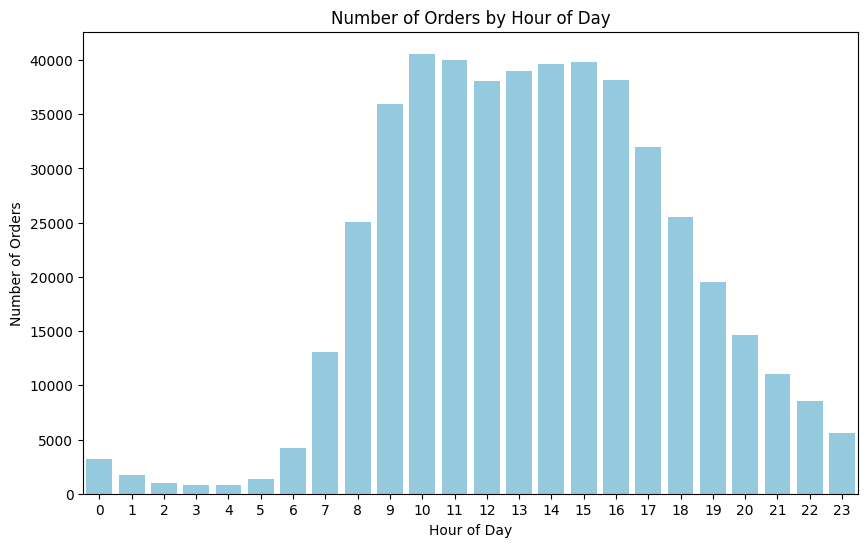

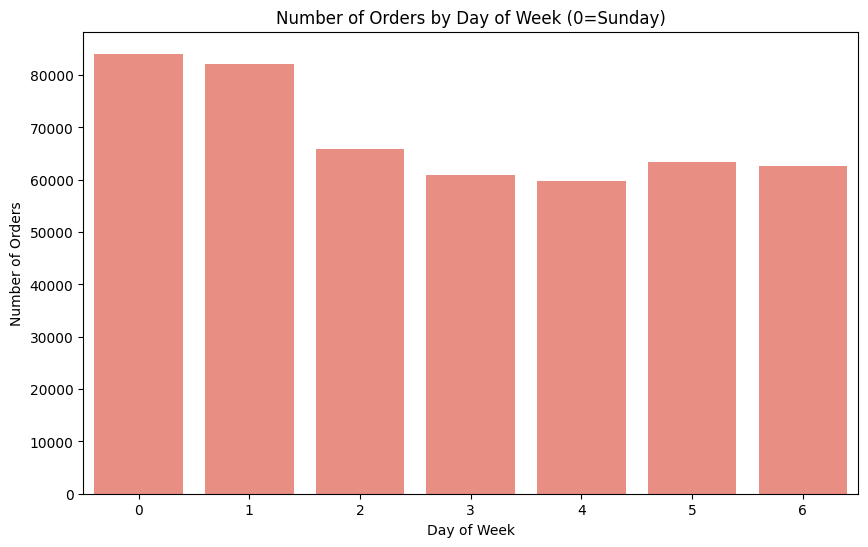

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Orders by hour of day
plt.figure(figsize=(10,6))
sns.countplot(x='order_hour_of_day', data=orders, color='skyblue')
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

# Orders by day of week
plt.figure(figsize=(10,6))
sns.countplot(x='order_dow', data=orders, color='salmon')
plt.title('Number of Orders by Day of Week (0=Sunday)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

### 1.8 Merge tables for product info

In [67]:
# Merge order_products with products to get product names in orders
orders_products_merged = order_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Example: top 20 most ordered products
top_products = orders_products_merged['product_name'].value_counts().head(20)
print(top_products)

Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: product_name, dtype: int64
